<a href="https://colab.research.google.com/github/kili-technology/kili-python-sdk/blob/main/recipes/importing_assets_and_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to import assets to a Kili project

In this tutorial, we will learn how to import assets to your project, and add metadata to those assets. 

Here are the steps that we will follow:

1. Setting up a simple Kili project to work with
2. Importing assets to Kili
3. Adding metadata to assets

## Setting up a simple Kili project to work with

### Installing and instantiating Kili

First, let's install and import the required modules.

In [ ]:
%pip install  kili

In [ ]:
import os

from kili.client import Kili

Now, let's set up variables needed to create an instance of the Kili object.

We will need your API key and Kili's API endpoint.

If you are unsure how to look up your API key, refer to [https://docs.kili-technology.com/docs/creating-an-api-key](https://docs.kili-technology.com/docs/creating-an-api-key).

In [ ]:
kili = Kili(
    # api_endpoint="https://cloud.kili-technology.com/api/label/v2/graphql",
    # the line above can be uncommented and changed if you are working with an on-premise version of Kili
)

### Creating a basic Kili project

To create a Kili project, you must first set up its interface.

We will create a simple image project with just one simple classification job and two categories: `OBJECT_A` and `OBJECT_B`.

To learn more about Kili project interfaces, refer to [https://docs.kili-technology.com/docs/customizing-project-interface](https://docs.kili-technology.com/docs/customizing-project-interface).

In [ ]:
interface = {
    "jobs": {
        "JOB_0": {
            "mlTask": "CLASSIFICATION",
            "required": 1,
            "isChild": False,
            "content": {
                "categories": {"OBJECT_A": {"name": "Object A"}, "OBJECT_B": {"name": "Object B"}},
                "input": "radio",
            },
        }
    }
}

project = kili.create_project(
    title="[Kili SDK Notebook]: Importing assets with metadata",
    description="Project Description",
    input_type="IMAGE",
    json_interface=interface,
)

For further processing, we will need to find out what our project ID is.

We can easily retrieve it from the project creation response message:

In [ ]:
project_id = project["id"]
print("Project ID: ", project_id)

Project ID:  cllamrwgl00670j393poh2t4j


## Importing assets to Kili

Now, let's add some assets to be labeled.

We will use some free off-the-shelf examples from the Internet.

In [ ]:
url1 = "https://storage.googleapis.com/label-public-staging/car/car_2.jpg"
url2 = "https://storage.googleapis.com/label-public-staging/car/car_1.jpg"
url3 = "https://storage.googleapis.com/label-public-staging/recipes/inference/black_car.jpg"

assets = kili.append_many_to_dataset(
    project_id=project_id,
    content_array=[url1, url2, url3],
    external_id_array=["image_1", "image_2", "image_3"],  # name to give to assets
)

At this point, you should be able to see your assets in your Kili project:

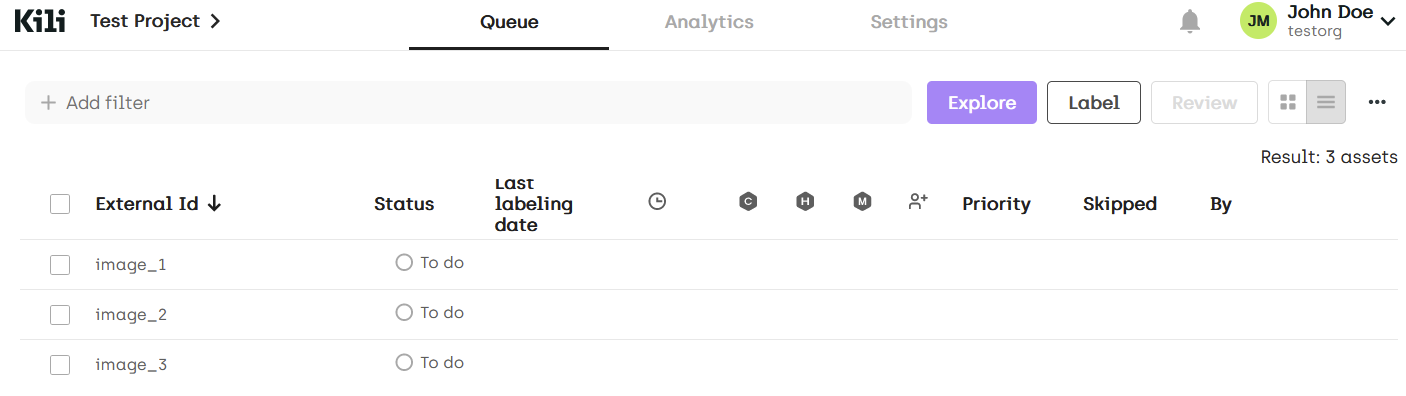

If you prefer to add your own images, you can use a local file. The code to do that would look similar to this:

```python
project_id = 'project_id'
assets = kili.append_many_to_dataset(
    project_id=project_id,
    content_array=['./image_1.jpeg'], # Path to local image
    external_id_array=['image_1']
)
```

The procedure looks the same for most of other data types, like PDFs or text. For more information on supported file formats, refer to [our documentation](https://docs.kili-technology.com/docs/supported-file-formats).

Because videos and Rich Text assets may be more complex to import, we've created separate tutorials devoted to them:

- For information on importing video assets, refer to [this tutorial](https://python-sdk-docs.kili-technology.com/latest/sdk/tutorials/importing_video_assets/).
- For information on importing Rich Text assets, see [here](https://python-sdk-docs.kili-technology.com/latest/sdk/tutorials/import_text_assets/).

For more information on importing assets, refer to [our documentation](https://docs.kili-technology.com/docs/adding-assets-to-project).

## Adding metadata to assets

In Kili, you can add extra information to an asset by using asset metadata.
The metadata can contain extra information like what language the document was written in, custom quality metrics, agreement metrics etc., and can be used with [Kili's advanced filters](https://docs.kili-technology.com/docs/filtering-assets-through-custom-search-queries). The metadata can also contain text extracted from images or PDF documents using OCR (Optical Character Recognition), and that will be shown in the [Kili labeling interface](https://docs.kili-technology.com/docs/optical-character-recognition).

Additionally, three specific metadata types can be used as information presented to labelers in Kili interface:

- `imageUrl`
- `text`
- `url`

As an optional step, you can set data types for each type of your metadata.
The default data type is `string`, but setting some of your metadata as `number` can really help apply filters on your assets later on.

Note that we don't need to set data types for `imageUrl`, `text`, and `url`.

In [ ]:
kili.update_properties_in_project(
    project_id=project_id,
    metadata_types={
        "customConsensus": "number",
        "sensitiveData": "string",
        "uploadedFromCloud": "string",
        "modelLabelErrorScore": "number",
    },
)

{'id': 'cllamrwgl00670j393poh2t4j',
 'metadataTypes': {'sensitiveData': 'string',
  'customConsensus': 'number',
  'uploadedFromCloud': 'string',
  'modelLabelErrorScore': 'number'}}

Now we can add metadata to our assets:

In [ ]:
external_ids = ["image_1", "image_2"]

kili.update_properties_in_assets(
    project_id=project_id,
    external_ids=external_ids,
    json_metadatas=[
        {
            "customConsensus": 10,
            "sensitiveData": "yes",
            "uploadedFromCloud": "no",
            "modelLabelErrorScore": 50,
            # Add metadata that will be visible to labelers in the labeling interface:
            "imageUrl": "www.example.com/image_1.png",
            "text": "some text for asset 1",
            "url": "www.example-website.com",
        },
        {
            "customConsensus": 40,
            "sensitiveData": "no",
            "uploadedFromCloud": "yes",
            "modelLabelErrorScore": 30,
            # Add metadata that will be visible to labelers in the labeling interface:
            "imageUrl": "www.example.com/image_2.png",
            "text": "some text for asset 2",
            "url": "www.example-website.com",
        },
    ],
)

[{'id': 'cllams1oz0000jhvz4hyxy0en'}, {'id': 'cllams1p00001jhvz75twgx7d'}]

In the labeling interface, we can see that the assets have some metadata:

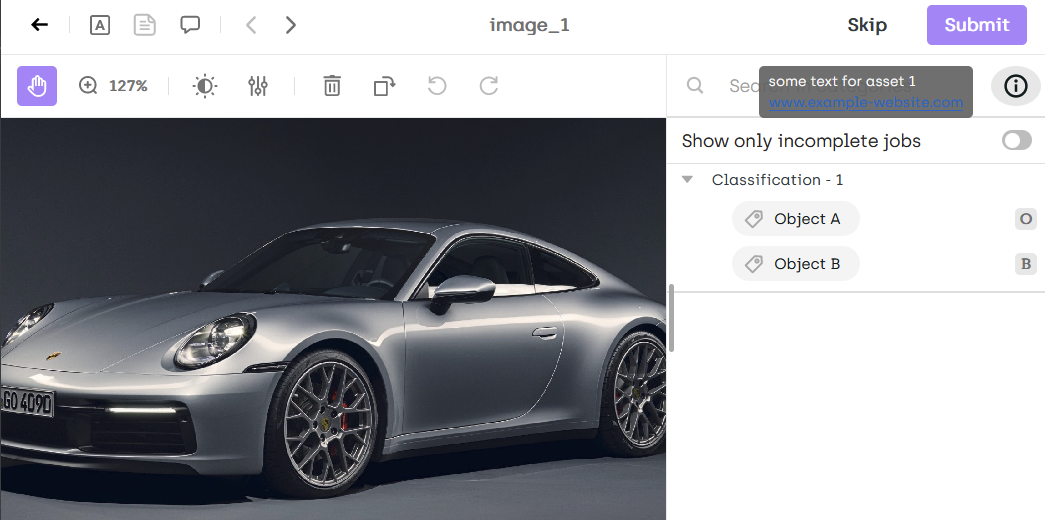

If you want to add metadata based on Optical Character Recognition, the process is slightly different. To help you with it, we've created a [separate tutorial](https://python-sdk-docs.kili-technology.com/latest/sdk/tutorials/ocr_pre_annotations/).

For more information on adding asset metadata, refer to our [documentation](https://docs.kili-technology.com/docs/adding-asset-metadata).

## Cleanup

We can remove the project that we created:

In [ ]:
kili.delete_project(project_id);

## Summary

We've successfully set up a Kili project, imported assets to it, and finally added some metadata to our assets. Well done!